In [21]:
from data_storage import create_connection
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from stockstats import StockDataFrame
#from pandas_profiling import ProfileReport

In [22]:
connection = create_connection("../database/crypto_billionairs.db")

In [24]:
df = pd.read_csv('../database/ETH_1min.txt', sep=",")
df.columns = ["time", "open", "high", "low", "close", "volume"]

In [26]:
df.head()

,time,open,high,low,close,volume
0,2016-03-11 05:53:00,11.85,11.85,11.85,11.85,0.024500
1,2016-03-11 05:54:00,11.85,11.85,11.85,11.85,0.024500
2,2016-03-11 12:27:00,11.80,11.80,11.80,11.80,0.024500
3,2016-03-11 13:45:00,11.80,11.80,11.80,11.80,1.727000
4,2016-03-11 16:50:00,11.85,11.95,11.85,11.95,7.290786


In [27]:
df["return"] = df['close'].pct_change() + 1 

In [28]:
#prof = ProfileReport(df)
#prof.to_file(output_file='data_profile.html')

No handles with labels found to put in legend.


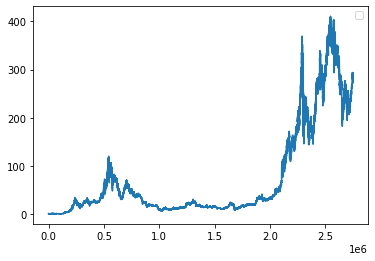

In [29]:
# Plot indexed returns.
plt.plot(np.cumprod(df["return"]))
plt.legend()
plt.show()

In [30]:
df.head()

,time,open,high,low,close,volume,return
0,2016-03-11 05:53:00,11.85,11.85,11.85,11.85,0.024500,NaN
1,2016-03-11 05:54:00,11.85,11.85,11.85,11.85,0.024500,1.000000
2,2016-03-11 12:27:00,11.80,11.80,11.80,11.80,0.024500,0.995781
3,2016-03-11 13:45:00,11.80,11.80,11.80,11.80,1.727000,1.000000
4,2016-03-11 16:50:00,11.85,11.95,11.85,11.95,7.290786,1.012712


In [31]:
df_ti = pd.DataFrame()
df_ti["open_time"] = df["time"]
df_ti["open"] = df["open"]
df_ti["close"] = df["close"]
df_ti["high"] = df["high"]
df_ti["low"] = df["low"]
df_ti["volume"] = df["volume"]

In [32]:
stock = StockDataFrame.retype(df_ti)

In [33]:
df["moving_average_convergence_divergence"] = stock.get("macd")

In [34]:
df["moving_average_convergence_divergence"] = df["moving_average_convergence_divergence"].astype(int)

In [35]:
def momentum(df, lag):
    return df.pct_change(periods=lag)

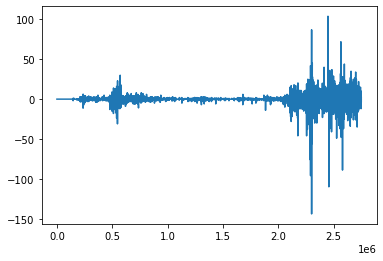

In [36]:
plt.plot(df["moving_average_convergence_divergence"])
plt.show()

In [37]:
df["momentum168"] = momentum(df["close"], 2016)

In [38]:
df.to_sql("ETHUSDT_5m_complete_history_short", connection, if_exists="replace")

### Short indicator analysis

In [39]:
df_momentum168 = pd.DataFrame()
df_momentum168["moving_average_convergence_divergence"] = df["moving_average_convergence_divergence"].shift(2016)
df_momentum168["momentum168"] = df["momentum168"]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_momentum168.groupby("moving_average_convergence_divergence").mean())#.where(df_momentum168.groupby("moving_average_convergence_divergence").mean() <= 0))

,momentum168
moving_average_convergence_divergence,
-144.0,0.378938
-136.0,0.264475
-133.0,0.387113
-125.0,0.237953
-116.0,0.365433
-112.0,0.325644
-110.0,0.237860
-108.0,0.073469
-104.0,0.244752


### Application of analysis

In [40]:
short_signals1 = df.index[df["moving_average_convergence_divergence"] >= 55].tolist()
short_signals = short_signals1

In [41]:
df["short_signals"] = 0
df["short_signals"].loc[short_signals] = 1

C:\Users\janfa\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [42]:
df["short_close_signals"] = 0
df["short_close_signals"] = df["short_signals"].shift(2016)

In [43]:
buy_colors = []
for value in df["short_signals"]:
    if value == 1:
        buy_colors.append("r")
    else:
        buy_colors.append("None")

In [44]:
sell_colors = []
for value in df["short_close_signals"]:
    if value == 1:
        sell_colors.append("g")
    else:
        sell_colors.append("None")

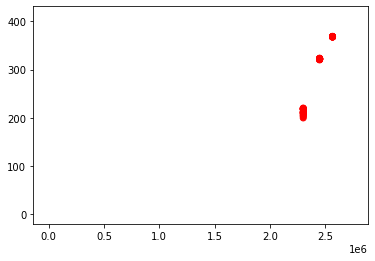

KeyboardInterrupt: 

In [45]:
plt.scatter(list(range(len(df))), np.cumprod(df["return"]), c=buy_colors)
plt.show()
plt.scatter(list(range(len(df))), np.cumprod(df["return"]), c=sell_colors)
plt.show()
plt.scatter(list(range(len(df))), np.cumprod(df["return"]), c=buy_colors)
plt.scatter(list(range(len(df))), np.cumprod(df["return"]), c=sell_colors)
plt.plot(np.cumprod(df["return"]))
plt.show()

In [46]:
df.to_sql("ETHUSDT_1m_complete_history_short", connection, if_exists="replace")